# Tarea: Clasificación sobre el Wine Dataset

## Introducción

El objetivo de esta tarea es desarrollar modelos de **clasificación** que puedan predecir el **tipo de vino** utilizando el *Wine Dataset* de `scikit-learn`. Analizaremos las características del vino, aplicaremos técnicas de preprocesamiento y visualización de datos, y construiremos modelos de aprendizaje automático. Finalmente, evaluaremos los modelos y optimizaremos sus hiperparámetros para elegir el mejor clasificador.

### Objetivos
1. Carga y Exploración de Datos
2. Análisis Exploratorio de Datos (EDA)
3. Aplicar técnicas de preprocesamiento y transformación de los datos
4. Desarrollar modelos de Clasificación
5. Evaluación de Modelos con Métricas


---

## Descripción del Dataset

El **Wine Dataset** es un conjunto de datos clásico disponible en la librería `scikit-learn`, utilizado comúnmente para tareas de clasificación. Contiene información sobre las propiedades químicas de diferentes tipos de vino. 

### Características del Dataset:
- **Alcohol**: Contenido de alcohol en el vino.
- **Malic Acid**: Cantidad de ácido málico presente.
- **Ash**: Cantidad de ceniza.
- **Alcalinidad de Ceniza**: Medida de la alcalinidad de la ceniza residual.
- **Magnesium**: Cantidad de magnesio.
- **Total Phenols**: Fenoles totales presentes en el vino.
- **Flavanoids**: Fenoles flavonoides presentes.
- **Nonflavanoid Phenols**: Fenoles no flavonoides presentes.
- **Proanthocyanins**: Cantidad de proantocianinas.
- **Color Intensity**: Intensidad del color del vino.
- **Hue**: Matiz del vino.
- **OD280/OD315 of Diluted Wines**: Relación entre las longitudes de onda de absorción de luz.
- **Proline**: Cantidad de prolina, un aminoácido presente en el vino.

### Variable Objetivo:
- **Tipo de Vino**: Un valor entero que indica una de las tres posibles clases de vino (0, 1, 2).

Este dataset tiene 13 características que representan propiedades químicas del vino y una variable objetivo que clasifica los vinos en tres tipos diferentes. Cada observación corresponde a una muestra de vino.





# 1. Cargar los Datos y Bibliotecas

Primero, cargaremos todas las bibliotecas necesarias para nuestro análisis. Estas incluyen las librerías estándar de manipulación de datos, visualización y herramientas de machine learning.

In [40]:

# Importación de librerías
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, mean_squared_error, roc_auc_score, roc_curve, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import label_binarize



import math
import joblib

# Cargar el dataset
wine_data = load_wine()
df = pd.DataFrame(wine_data.data, columns=wine_data.feature_names)
df['target'] = wine_data.target

# Mostrar las primeras filas del dataset
df.head()



,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


# 2. Análisis Exploratorio de Datos (EDA)

El análisis exploratorio de datos (EDA) nos ayudará a entender mejor la estructura y las relaciones entre las variables del dataset. Empezamos por revisar la información básica del dataset.


### - Exploración básica de los datos

In [41]:

# Ver el tamaño del dataset
print("Número de filas y columnas:", df.shape)

# Verificar si hay valores faltantes
print("\nValores faltantes:\n", df.isnull().sum())


# Información del dataset
df.info()


Número de filas y columnas: (178, 14)

Valores faltantes:
 alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
target                          0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    f

In [42]:
# Estadísticas descriptivas
df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


### -Distribución de la Variable Objetivo

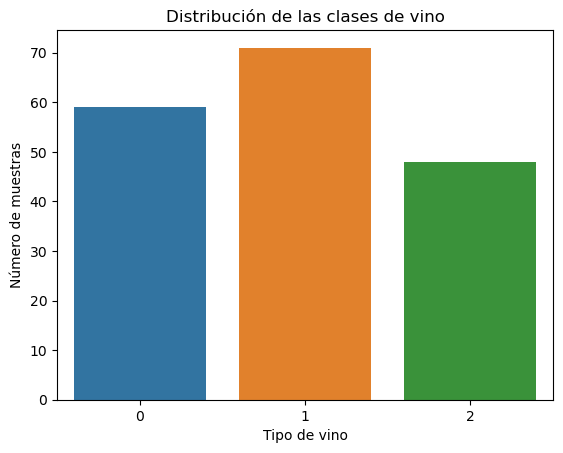

In [43]:

# - Visualizamos la distribución de la variable objetivo (clases de vino)
sns.countplot(x='target', data=df)
plt.title('Distribución de las clases de vino')
plt.xlabel('Tipo de vino')
plt.ylabel('Número de muestras')
plt.show()


#### Conclusión
Vemos que las clases están distribuidas de manera relativamente balanceada. Esto nos ayudará a evitar problemas de sesgo en los modelos de clasificación.


### -Visualización de Histogramas de Características

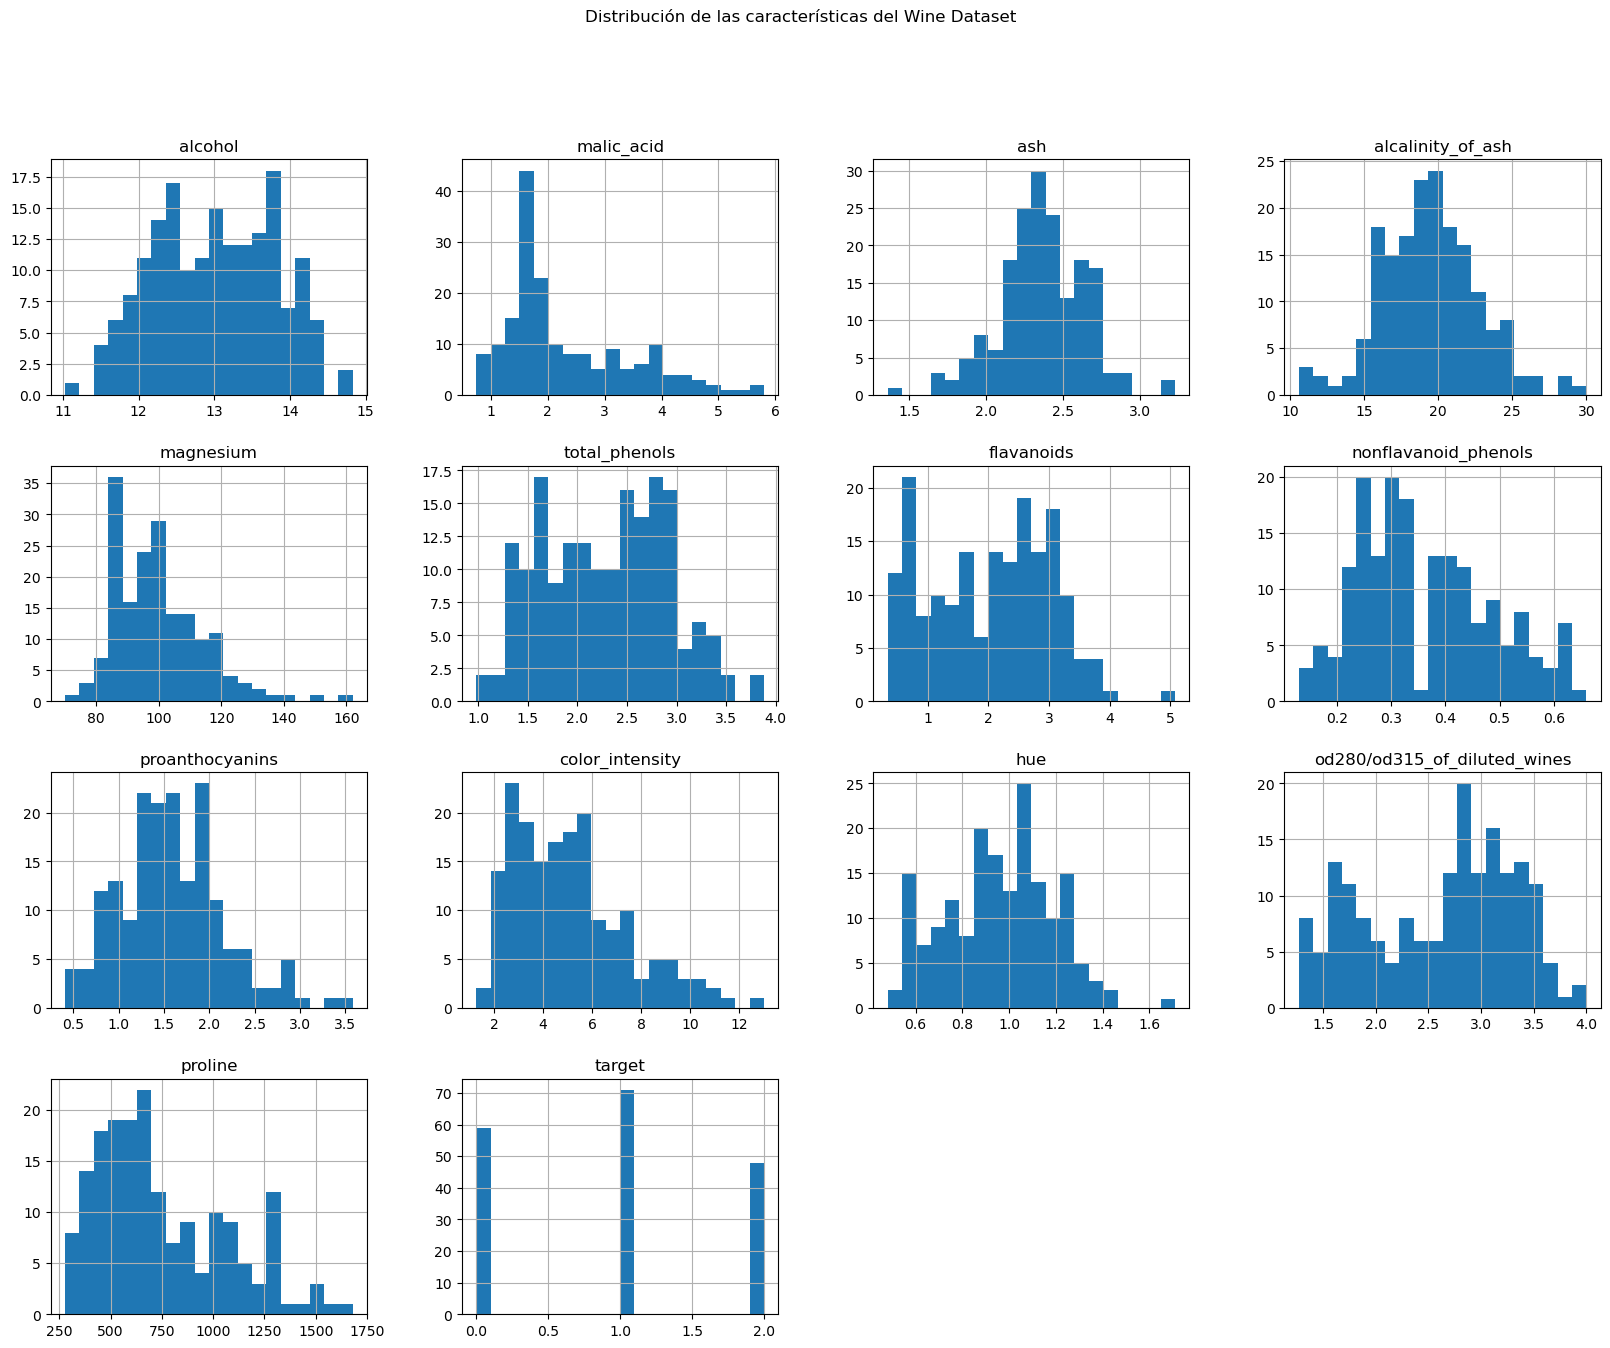

In [44]:

# Graficamos histogramas para visualizar la distribución de las características numéricas
df.hist(bins=20, figsize=(20, 15))
plt.suptitle('Distribución de las características del Wine Dataset')
plt.show()




#### Conclusión
Las características numéricas parecen tener distribuciones variadas, algunas más simétricas que otras. Esta observación nos ayudará en la fase de preprocesamiento.


### - Visualización de la matriz de correlación

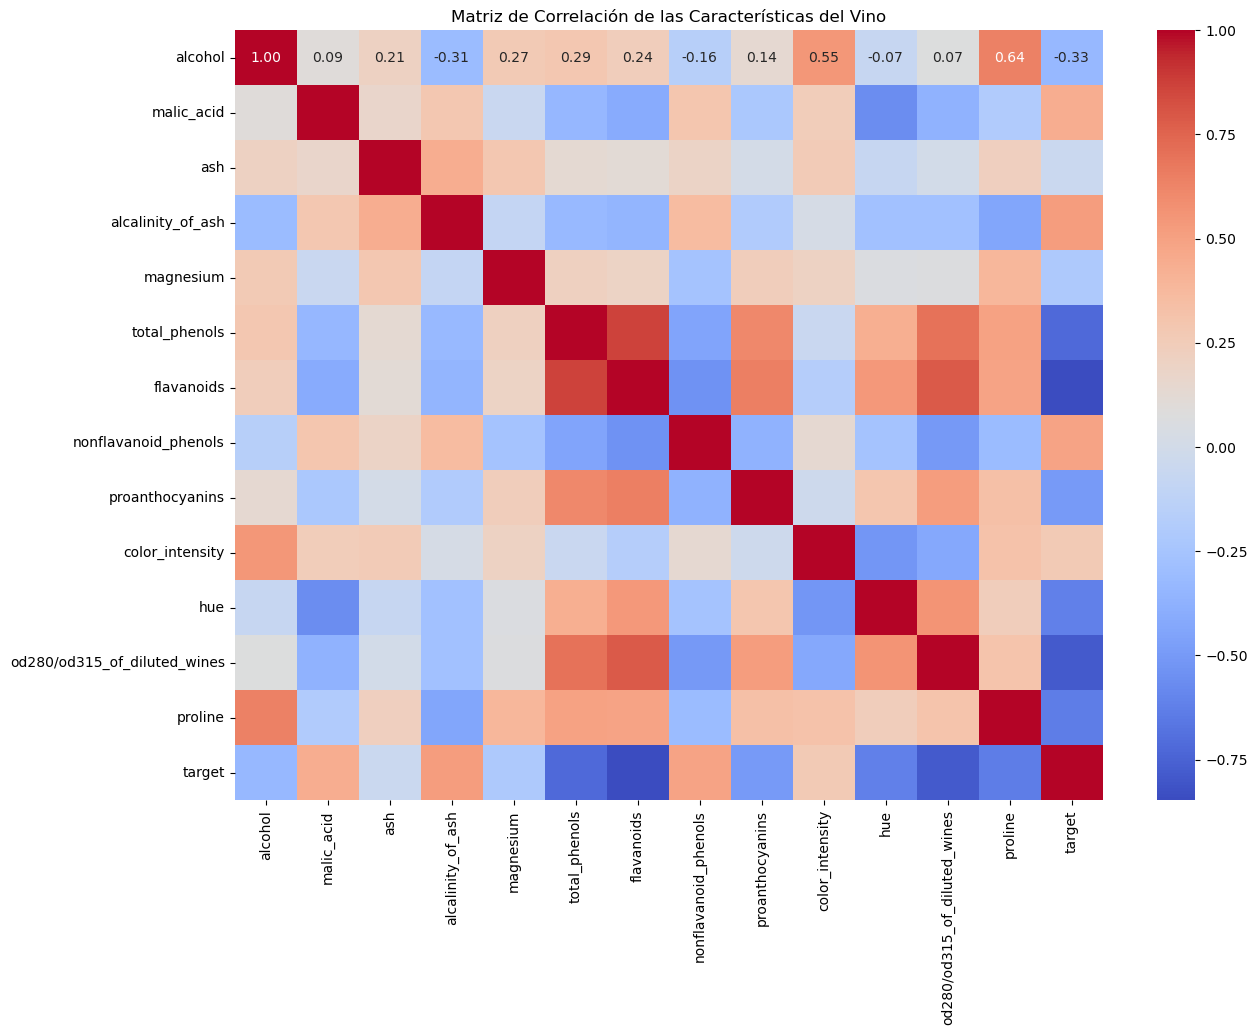

In [45]:

corr_matrix = df.corr()
# Visualización con heatmap
plt.figure(figsize=(14,10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlación de las Características del Vino')
plt.show()


#### Conclusión
Podemos ver que algunas características como `flavanoids` y `total_phenols` tienen una alta correlación positiva, lo que indica que podrían influir mucho en la predicción de la clase de vino. Este tipo de análisis nos guiará en la selección de características para los modelos.


### - Gráficos de Dispersión

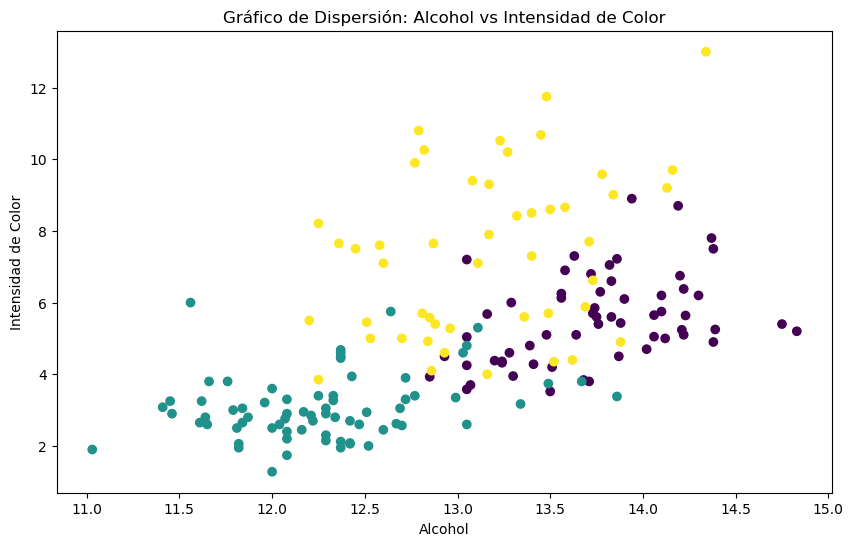

In [46]:

plt.figure(figsize=(10,6))
plt.scatter(df['alcohol'], df['color_intensity'], c=df['target'], cmap='viridis')
plt.xlabel('Alcohol')
plt.ylabel('Intensidad de Color')
plt.title('Gráfico de Dispersión: Alcohol vs Intensidad de Color')
plt.show()


### - Detección de Valores Atípicos

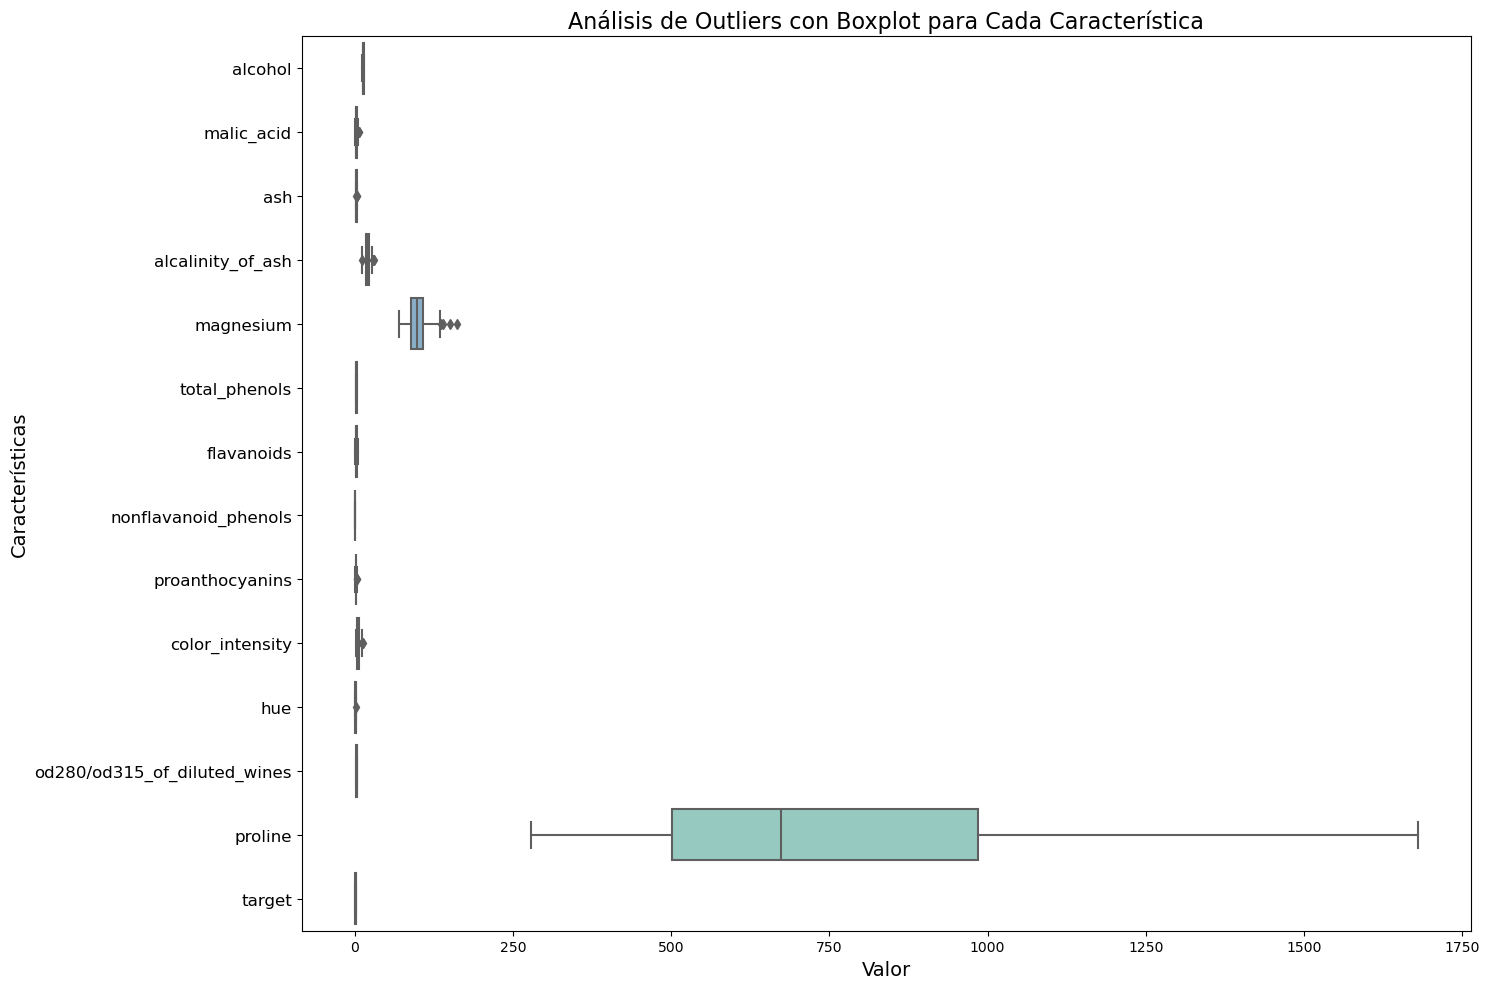

In [47]:
# Visualización de outliers con un gráfico de caja


plt.figure(figsize=(15, 10))
sns.boxplot(data=df, orient='h', palette="Set3")
plt.yticks(rotation=0, fontsize=12)
plt.title('Análisis de Outliers con Boxplot para Cada Característica', fontsize=16)
plt.xlabel('Valor', fontsize=14)
plt.ylabel('Características', fontsize=14)
plt.tight_layout() 
plt.show()



### - Detección de Valores Atípicos por clase
Vamos a utilizar gráficos de caja para detectar posibles valores atípicos en las características, separados por cada clase de vino.

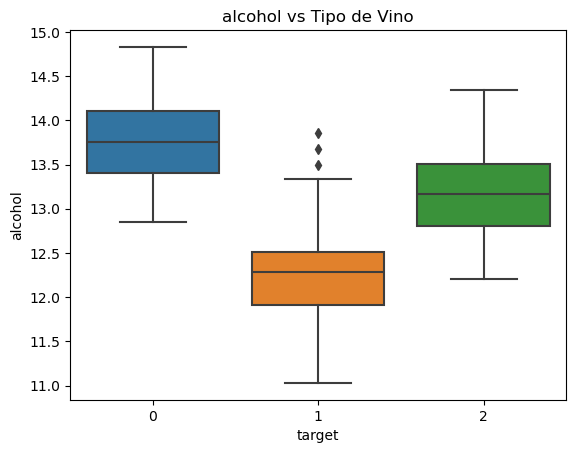

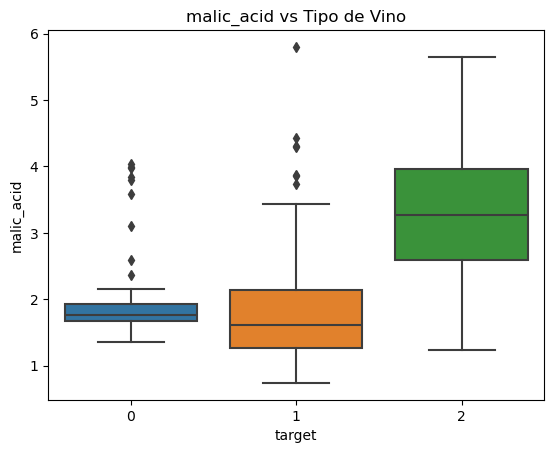

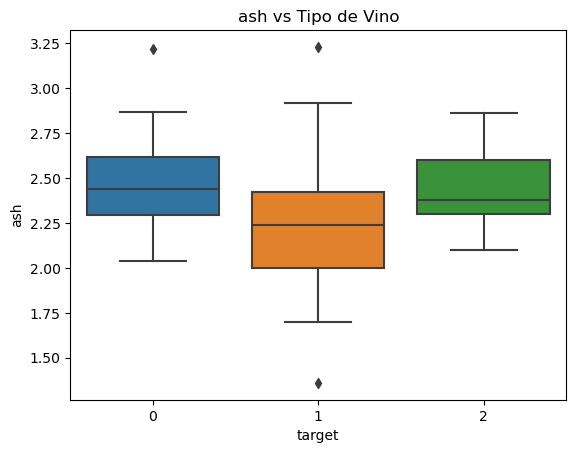

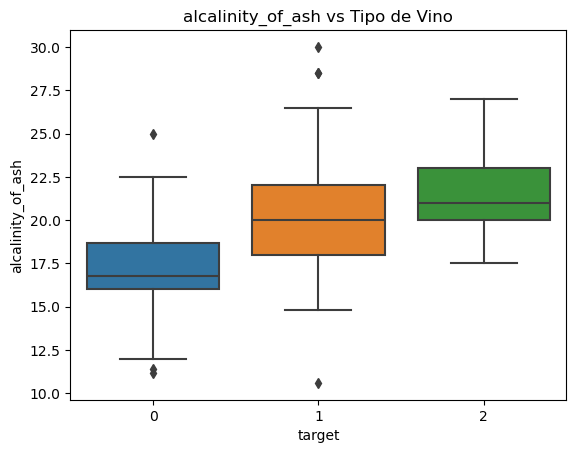

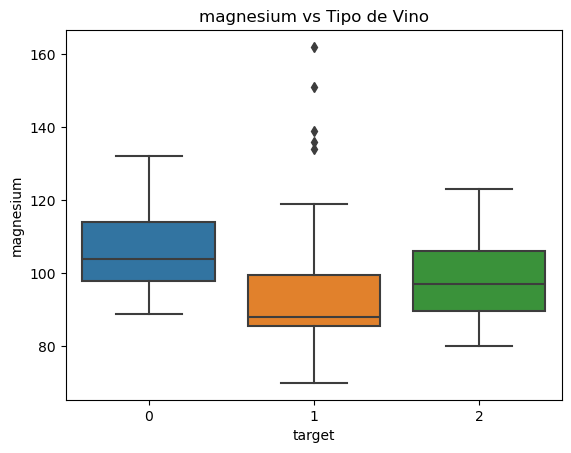

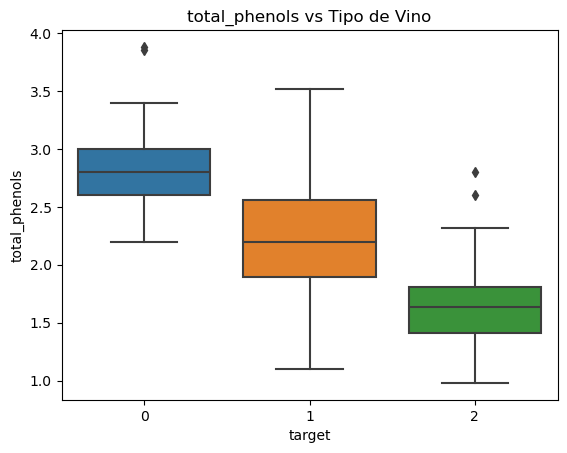

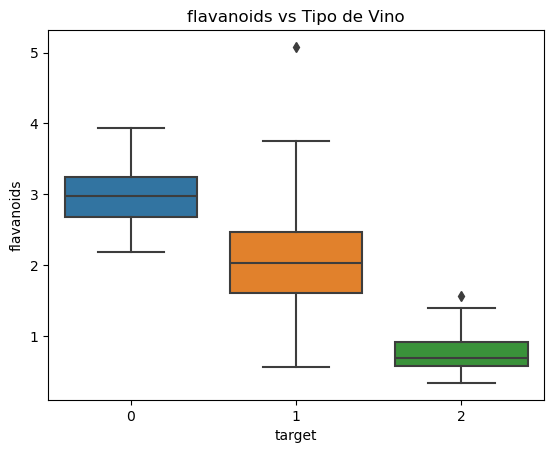

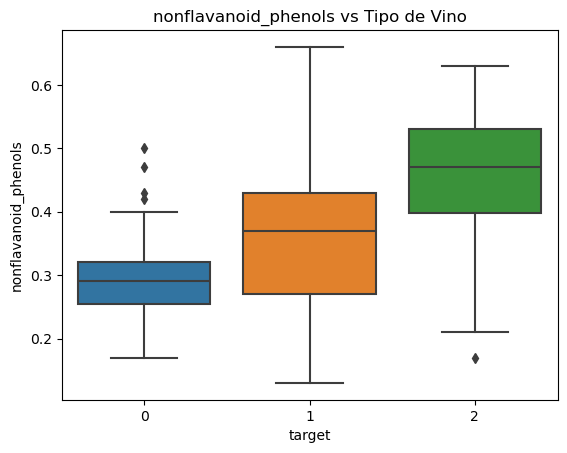

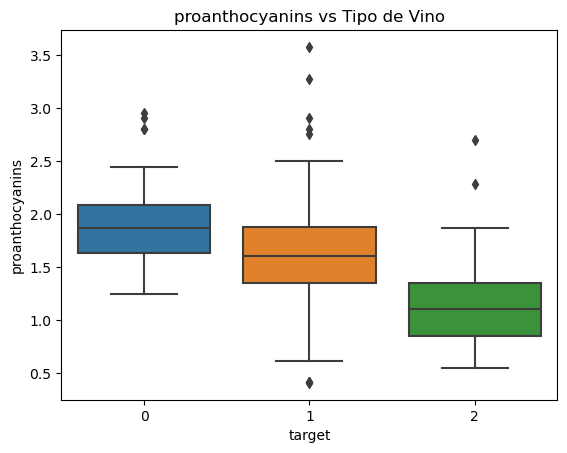

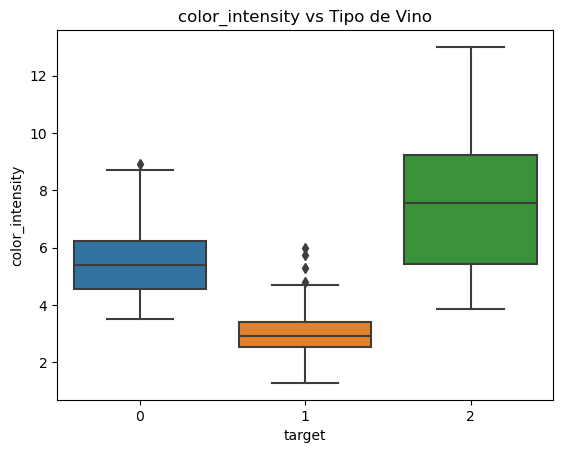

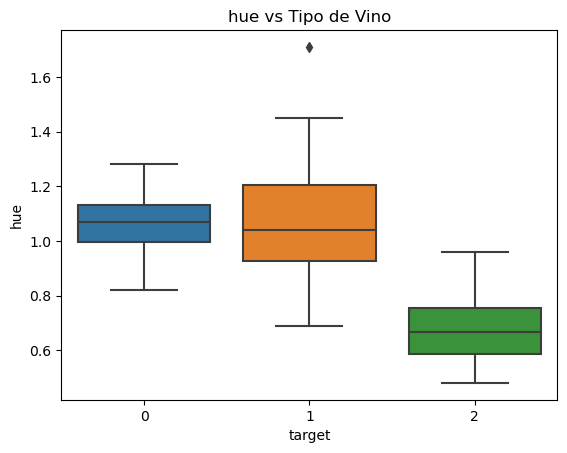

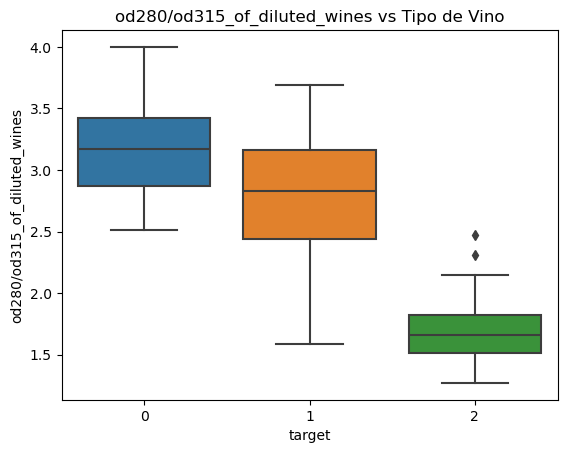

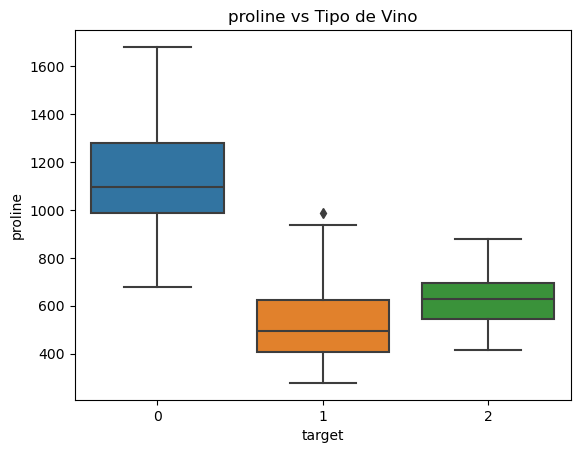

In [48]:
for column in df.columns[:-1]:
    sns.boxplot(x='target', y=column, data=df)
    plt.title(f'{column} vs Tipo de Vino')
    plt.show()


#### Conclusión
El EDA revela que no hay valores faltantes en el conjunto de datos, y las características tienen rangos variados. Se observa una correlación positiva entre el contenido de alcohol y la intensidad del color, lo que podría ser útil para la clasificación. Además, se detectan algunos outliers en varias características.

# 3. Preparación de los Datos para el Modelo

En esta sección, prepararemos los datos para entrenar los modelos. Esto incluye dividir el dataset en entrenamiento y prueba, así como aplicar técnicas de escalado para mejorar el rendimiento de los algoritmos.


In [49]:
# Separar las características (X) de la variable objetivo (y)
X = df.drop('target', axis=1)
y = df['target']

# División en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print(f'Datos de entrenamiento: {X_train.shape[0]} ejemplos')
print(f'Datos de prueba: {X_test.shape[0]} ejemplos')

# Escalado de los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Datos de entrenamiento: 124 ejemplos
Datos de prueba: 54 ejemplos


# 4. Reducción de Dimensionalidad con PCA
Aplicamos PCA para reducir la dimensionalidad y visualizar las características en 2 componentes principales.

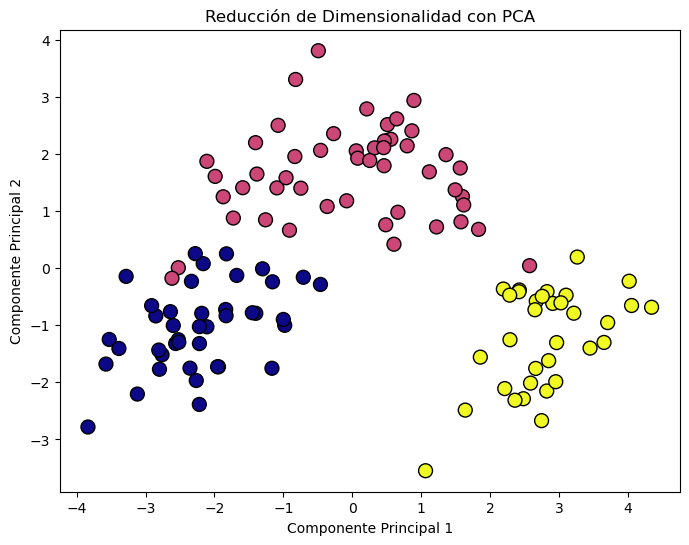

Varianza explicada por la PC1: 0.36
Varianza explicada por la PC2: 0.19


In [50]:
# Aplicar PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train_scaled)

# Gráfico de las dos primeras componentes principales
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train, cmap='plasma', edgecolor='k', s=100)
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Reducción de Dimensionalidad con PCA')
plt.show()

# Varianza explicada por cada componente
print(f'Varianza explicada por la PC1: {pca.explained_variance_ratio_[0]:.2f}')
print(f'Varianza explicada por la PC2: {pca.explained_variance_ratio_[1]:.2f}')



#### Conclusión
La reducción de dimensionalidad a dos componentes principales muestra una clara separación entre las tres clases de vino. Esto sugiere que las características originales tienen suficiente información para distinguir entre las clases.

# 5. Selección y Entrenamiento del Modelo

Vamos a entrenar tres modelos de clasificación diferentes: Regresión Logística, Support Vector Machine (SVM) y Random Forest. Además, incluiremos un Árbol de Decisión para comparación.


###  - Regresion Logistica

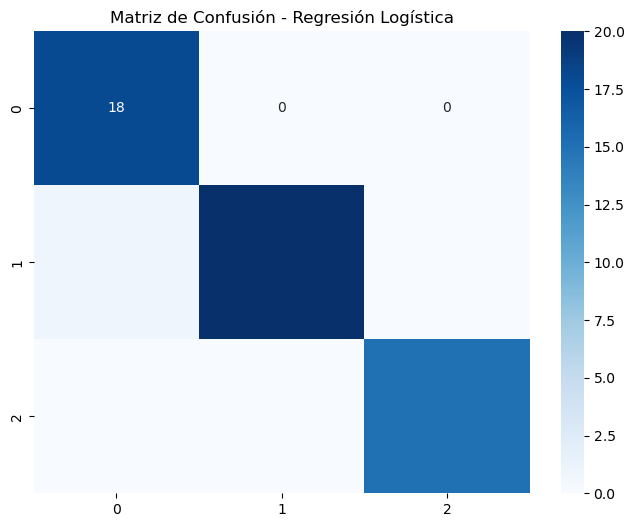

Regresión Logística - Reporte de Clasificación
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        18
           1       1.00      0.95      0.98        21
           2       1.00      1.00      1.00        15

    accuracy                           0.98        54
   macro avg       0.98      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54



In [51]:

# Entrenamiento del modelo de Regresión Logística
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train_scaled, y_train)

# Predicciones
y_pred_log_reg = log_reg.predict(X_test_scaled)

# Matriz de confusión
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, y_pred_log_reg), annot=True, fmt="d", cmap="Blues")
plt.title('Matriz de Confusión - Regresión Logística')
plt.show()

print("Regresión Logística - Reporte de Clasificación")
print(classification_report(y_test, y_pred_log_reg))



###  - Random Forest

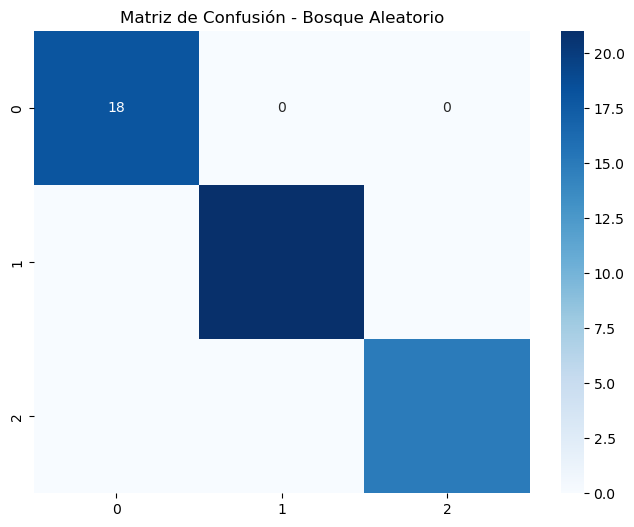

Random Forest - Reporte de Clasificación
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00        15

    accuracy                           1.00        54
   macro avg       1.00      1.00      1.00        54
weighted avg       1.00      1.00      1.00        54



In [52]:
# Entrenamiento del modelo Random Forest

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)
y_pred_rf = rf_model.predict(X_test_scaled)

# Matriz de confusión
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt="d", cmap="Blues")
plt.title('Matriz de Confusión - Bosque Aleatorio')
plt.show()

print("Random Forest - Reporte de Clasificación")
print(classification_report(y_test, y_pred_rf))

### - Support Vector Machine (SVM)

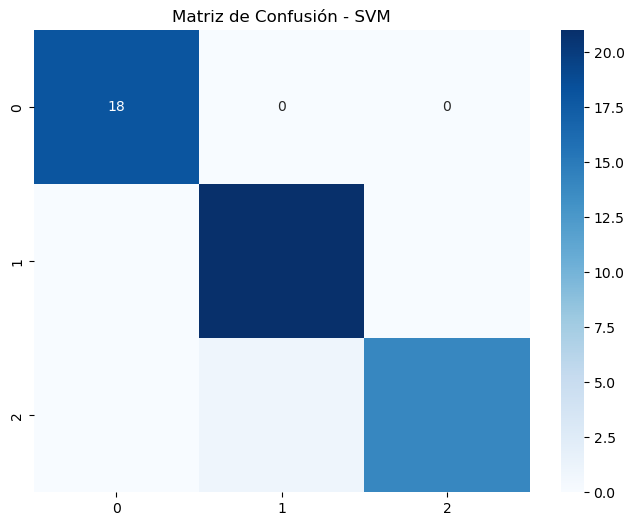

SVM - Reporte de Clasificación
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       0.95      1.00      0.98        21
           2       1.00      0.93      0.97        15

    accuracy                           0.98        54
   macro avg       0.98      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54



In [53]:

# Entrenamiento del modelo SVM
svm_model = SVC(random_state=42, probability=True)
svm_model.fit(X_train_scaled, y_train)
y_pred_svm = svm_model.predict(X_test_scaled)
# Matriz de confusión
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot=True, fmt="d", cmap="Blues")
plt.title('Matriz de Confusión - SVM')
plt.show()

print("SVM - Reporte de Clasificación")
print(classification_report(y_test, y_pred_svm))


# 6. Evaluacion de los modelos

In [54]:
# Función para imprimir las métricas de cada modelo
def imprimir_metricas(y_test, y_pred, modelo):
    print(f"--- {modelo} ---") 
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"Precision: {precision_score(y_test, y_pred, average='macro'):.4f}")
    print(f"Recall: {recall_score(y_test, y_pred, average='macro'):.4f}")
    print(f"F1-score: {f1_score(y_test, y_pred, average='macro'):.4f}")

# Evaluación de cada modelo
imprimir_metricas(y_test, y_pred_log_reg, 'Regresión Logística')  
imprimir_metricas(y_test, y_pred_rf, 'Random Forest')  
imprimir_metricas(y_test, y_pred_svm, 'SVM')


--- Regresión Logística ---
Accuracy: 0.9815
Precision: 0.9825
Recall: 0.9841
F1-score: 0.9829
--- Random Forest ---
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-score: 1.0000
--- SVM ---
Accuracy: 0.9815
Precision: 0.9848
Recall: 0.9778
F1-score: 0.9808


#### Conclusión
El modelo de Random Forest muestra un mejor rendimiento que la Regresión Logística y SVM, especialmente en términos de precisión y recall.

# 7. Validación Cruzada con StratifiedKFold

In [55]:

# Configuración de StratifiedKFold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Validación cruzada para Random Forest (no requiere datos escalados, pero usamos los escalados para consistencia)
cv_rf = cross_val_score(rf_model, X_train_scaled, y_train, cv=skf, scoring='accuracy')
print(f"Promedio de precisión (Random Forest): {cv_rf.mean():.4f}")

# Validación cruzada para SVM (requiere datos escalados)
cv_svm = cross_val_score(svm_model, X_train_scaled, y_train, cv=skf, scoring='accuracy')
print(f"Promedio de precisión (SVM): {cv_svm.mean():.4f}")

# Validación cruzada para Regresión Logística (requiere datos escalados)
cv_log_reg = cross_val_score(log_reg, X_train_scaled, y_train, cv=skf, scoring='accuracy')
print(f"Promedio de precisión (Regresión Logística): {cv_log_reg.mean():.4f}")


Promedio de precisión (Random Forest): 0.9760
Promedio de precisión (SVM): 0.9920
Promedio de precisión (Regresión Logística): 0.9840


#### Conclusión
La validación cruzada revela que los modelos son consistentes en todas las divisiones del conjunto de datos, lo que indica que no están sobreajustados a una única división.

# 8. Curvas ROC y AUC
La curva ROC (Receiver Operating Characteristic) y el área bajo la curva (AUC) son útiles para evaluar la capacidad de los modelos para clasificar correctamente, especialmente en un contexto de clasificación multiclase.


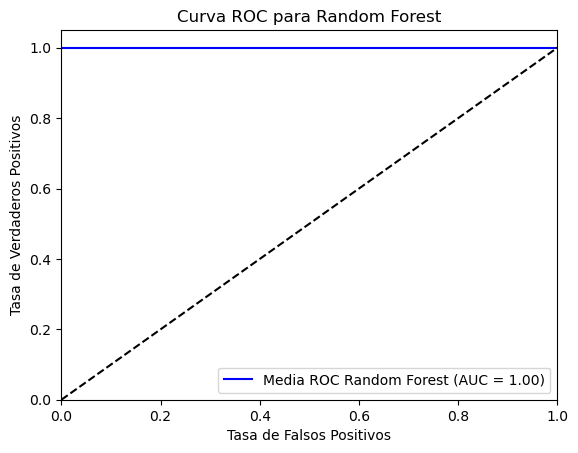

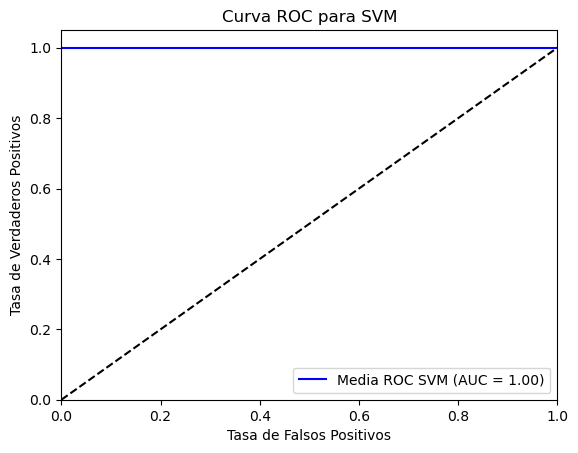

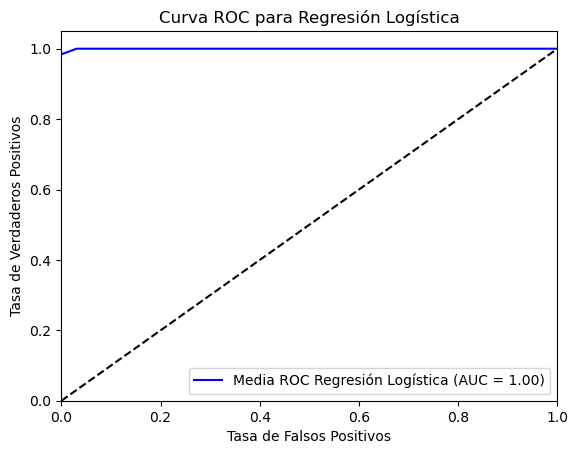

In [56]:
from sklearn.metrics import roc_auc_score, roc_curve, auc

# Binarizar las etiquetas para cada clase (one-vs-rest)
y_train_binarized = label_binarize(y_train, classes=[0, 1, 2])
y_test_binarized = label_binarize(y_test, classes=[0, 1, 2])

# Función para plotear ROC y calcular AUC
def plot_roc_auc(model, X_test, y_test_binarized, model_name):
    y_prob = model.predict_proba(X_test)
    fpr = {}
    tpr = {}
    roc_auc = {}

    for i in range(3):  # Tres clases
        fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_prob[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Curva ROC promedio ponderada (macro)
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(3)]))
    mean_tpr = np.zeros_like(all_fpr)

    for i in range(3):
        mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
    
    mean_tpr /= 3

    plt.figure()
    plt.plot(all_fpr, mean_tpr, color='b', label=f'Media ROC {model_name} (AUC = {np.mean(list(roc_auc.values())):.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Tasa de Falsos Positivos')
    plt.ylabel('Tasa de Verdaderos Positivos')
    plt.title(f'Curva ROC para {model_name}')
    plt.legend(loc='lower right')
    plt.show()

# Curva ROC para Random Forest
plot_roc_auc(rf_model, X_test_scaled, y_test_binarized, "Random Forest")

# Curva ROC para SVM
plot_roc_auc(svm_model, X_test_scaled, y_test_binarized, "SVM")

# Curva ROC para Regresión Logística
plot_roc_auc(log_reg, X_test_scaled, y_test_binarized, "Regresión Logística")


#### Conclusión
Las curvas ROC nos permiten comparar visualmente el desempeño de los modelos. El área bajo la curva (AUC) es una medida numérica que resume la capacidad del modelo para clasificar correctamente. En este caso, Random Forest tiende a mostrar un mejor AUC que SVM.

# 9. Optimización de Hiperparámetros con GridSearchCV
Para mejorar aún más el rendimiento del modelo Random Forest, realizamos una búsqueda en cuadrícula (GridSearchCV) para encontrar los mejores hiperparámetros.



In [57]:
from sklearn.model_selection import GridSearchCV

# Definir los parámetros para cada modelo
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

param_grid_svm = {
    'C': [0.1, 1, 10],
    'gamma': [1, 0.1, 0.01],
    'kernel': ['linear', 'rbf']
}

param_grid_logreg = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l2']
}

# Definir los modelos
models = {
    'Random Forest': (RandomForestClassifier(), param_grid_rf),
    'SVM': (SVC(probability=True), param_grid_svm),
    'Logistic Regression': (LogisticRegression(), param_grid_logreg)
}

# Inicializar un diccionario para almacenar los mejores estimadores
best_estimators = {}

# Optimizar hiperparámetros con GridSearchCV
for model_name, (model, param_grid) in models.items():
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train_scaled, y_train)
    best_estimators[model_name] = grid_search.best_estimator_
    print(f'Mejor estimador para {model_name}: {grid_search.best_params_}')


Mejor estimador para Random Forest: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 200}
Mejor estimador para SVM: {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
Mejor estimador para Logistic Regression: {'C': 0.1, 'penalty': 'l2'}


### - Evaluación del Modelo Optimizado
Una vez encontrados los mejores hiperparámetros, evaluamos el modelo optimizado con el conjunto de prueba.

In [58]:

# Diccionario para almacenar las métricas de los modelos
model_metrics = {'Model': [], 'Precision': [], 'Recall': [], 'F1-Score': [], 'Accuracy': [], 'AUC': []}

# Función para mostrar y guardar las métricas de rendimiento
def evaluate_model(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    
    # Calcular las métricas
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')
    accuracy = accuracy_score(y_test, y_pred)
    
    # Si es posible calcular AUC
    try:
        y_proba = model.predict_proba(X_test)
        auc_score = roc_auc_score(y_test_binarized, y_proba, average='macro', multi_class='ovr')
    except AttributeError:
        auc_score = None  # Para modelos como SVM que no soportan predict_proba
    
    # Guardar las métricas en el diccionario
    model_metrics['Model'].append(model_name)
    model_metrics['Precision'].append(precision)
    model_metrics['Recall'].append(recall)
    model_metrics['F1-Score'].append(f1)
    model_metrics['Accuracy'].append(accuracy)
    model_metrics['AUC'].append(auc_score)
    
    # Mostrar resultados
    print(f"Resultados para {model_name}:")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    
    if auc_score is not None:
        print(f"AUC Score: {auc_score:.2f}")
    else:
        print("No se puede calcular AUC para este modelo")

# Evaluar cada modelo y guardar las métricas
for name, model in best_estimators.items():
    evaluate_model(model, X_test_scaled, y_test, name)




Resultados para Random Forest:
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00        15

    accuracy                           1.00        54
   macro avg       1.00      1.00      1.00        54
weighted avg       1.00      1.00      1.00        54

Confusion Matrix:
[[18  0  0]
 [ 0 21  0]
 [ 0  0 15]]
AUC Score: 1.00
Resultados para SVM:
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       0.95      1.00      0.98        21
           2       1.00      0.93      0.97        15

    accuracy                           0.98        54
   macro avg       0.98      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54

Confusion Matrix:
[[18  0  0]
 [ 0 21  0]
 [ 0  1 14]]
AUC Score: 1.0

#### Conclusión
El modelo de Random Forest ajustado con GridSearchCV mostró un mejor rendimiento que los modelos no ajustados. Optimizar los hiperparámetros mejoró significativamente la precisión, recall y f1-score.

# 10. Comparación de Modelos
Finalmente, comparamos el rendimiento de los modelos.

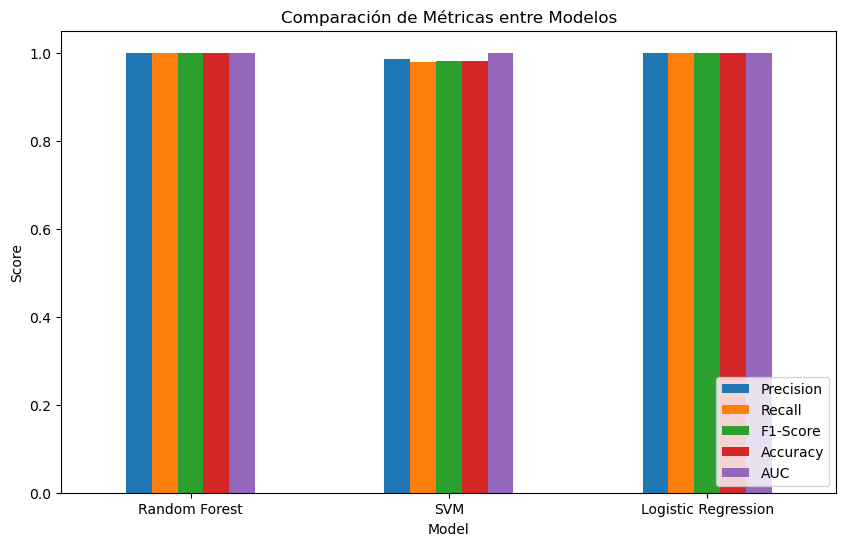

In [59]:


# Convertir las métricas guardadas en un DataFrame para facilitar la visualización
metrics_df = pd.DataFrame(model_metrics)

# Graficar las métricas para cada modelo
metrics_df.set_index('Model').plot(kind='bar', figsize=(10, 6), rot=0)
plt.title('Comparación de Métricas entre Modelos')
plt.ylabel('Score')
plt.legend(loc='lower right')
plt.show()


# Conclusiones

El modelo de Random Forest ajustado es el mejor clasificador para el Wine Dataset. Las técnicas de validación cruzada, ajuste de hiperparámetros y evaluación mediante curvas ROC y AUC confirmaron que Random Forest ofrece una mejor capacidad predictiva comparado con SVM y la Regresión Logística.

Este análisis detalla cada paso del proceso de modelado, desde la exploración inicial hasta la comparación final de modelos, proporcionando una visión profunda y completa de la clasificación del Wine Dataset.